### Link to Dataset

https://drive.google.com/open?id=1OHBfpUf-6nLjCbrrAEhq2wGfehd9g-MV

In [1]:
#Making necesarry imports
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import numpy as np
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import os, sys
import re
import seaborn as sb

In [2]:
books = pd.read_csv('BX-Books.csv', error_bad_lines=False, encoding='latin-1')
books.columns = ['ISBN', 'book_title', 'book_author', 'year_of_publication', 'publisher', 
                 'image_url_s', 'image_url_m', 'image_url_l']
'''
ratings = pd.read_csv('BX-Book-Ratings.csv', error_bad_lines=False, encoding='latin-1')
ratings.columns = ['user_id', 'ISBN', 'book_rating'] '''

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 10824: expected 8 fields, saw 9\nSkipping line 14769: expected 8 fields, saw 9\nSkipping line 14936: expected 8 fields, saw 9\nSkipping line 15690: expected 8 fields, saw 10\nSkipping line 17320: expected 8 fields, saw 9\nSkipping line 18095: expected 8 fields, saw 9\nSkipping line 28443: expected 8 fields, saw 9\nSkipping line 33098: expected 8 fields, saw 9\nSkipping line 36394: expected 8 fields, saw 12\nSkipping line 42628: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\nSkipping line 52174: expected 8 fields, saw 9\nSkipping line 56901: expected 8 fields, saw 10\nSkipping line 58600: expected 8 fields, saw 10\nSkipping line 60739: expected 8 fields, saw 10\n'
b'Skipping line 65756: expected 8 fields, saw 9\nSkipping line 67924: expected 8 fields, saw 9\nSkipping line 68134: expected 8 fields, saw 9\nSkipping line 70764: expected 8 fields, saw 11\nS

"\nratings = pd.read_csv('BX-Book-Ratings.csv', error_bad_lines=False, encoding='latin-1')\nratings.columns = ['user_id', 'ISBN', 'book_rating'] "

In [3]:
# checking null cells in dataset

print("Before\n")
print(books.isnull().sum())

# removing null rows in dataset

books = books.dropna()
print("After\n")
print(books.isnull().sum())

Before

ISBN                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
image_url_s            0
image_url_m            0
image_url_l            3
dtype: int64
After

ISBN                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
image_url_s            0
image_url_m            0
image_url_l            0
dtype: int64


### Books Dataset

In [4]:
books.head()

,ISBN,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,"W. W. Norton &amp, Company",http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
# axis = 0 (along row) and axis = 1 (along column)
# Feature Selection - Remove Url as don't have any influence on our prediction


books = books.drop(['image_url_s', 'image_url_m', 'image_url_l'], axis=1) 

In [6]:
books.dtypes

ISBN                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
dtype: object

In [7]:
pd.set_option('display.max_colwidth', -1)

In [8]:
'''
    Cleaning year_of_publicarion series
'''

books['year_of_publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '1996', '1990', '1997', '0',
       '1998', '1994', '1999', '2004', '1968', '1982', '1987', '1977',
       '1992', '2000', '1984', '1995', '2002', '1988', '2001', '1991',
       '2003', '1963', '1986', '1993', '1956', '1989', '1981', '1974',
       '1983', '1970', '1985', '1978', '1973', '1980', '1979'

In [9]:
'''
    PROBLEM 1) some values are string and some are int 
''' 

# books['year_of_publication'].dtypes (check type of series)

books['year_of_publication']=pd.to_numeric(books.year_of_publication, errors= 'coerce')
sorted(books['year_of_publication'].unique())

[0,
 1376,
 1378,
 1806,
 1897,
 1900,
 1901,
 1902,
 1904,
 1906,
 1908,
 1909,
 1910,
 1911,
 1914,
 1917,
 1919,
 1920,
 1921,
 1922,
 1923,
 1924,
 1925,
 1926,
 1927,
 1928,
 1929,
 1930,
 1931,
 1932,
 1933,
 1934,
 1935,
 1936,
 1937,
 1938,
 1939,
 1940,
 1941,
 1942,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2008,
 2010,
 2011,
 2012,
 2020,
 2021,
 2024,
 2026,
 2030,
 2037,
 2038,
 2050]

In [10]:
''' 
    PROBLEM 2) year of publication is 0
        M-1) Drop columns
        M-2) Mean of Year (round off)
        M-3) Frequency of Maximum occuring 
        M-4) Randomly assign a year
'''

# finding the most frequent value

print("frequency of maximum year = %d" % books['year_of_publication'].value_counts().max())
print("most frequently occuring year = %d\n\n"%books['year_of_publication'].value_counts().idxmax())

# replacing '0' with most frequent number

books['year_of_publication'].replace(0, books['year_of_publication'].value_counts().idxmax(), inplace=True)
print(sorted(books['year_of_publication'].unique()))

frequency of maximum year = 17621
most frequently occuring year = 2002


[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2008, 2010, 2011, 2012, 2020, 2021, 2024, 2026, 2030, 2037, 2038, 2050]


In [11]:
'''
    PROBLEM 3) year of publication is greater than 2006, which cannot be possible since dataset is till year 2006
'''

# Replacing greater values with mean value

#books['year_of_publication'].replace(books.loc[books['year_of_publication']>2018,'year_of_publication'], 2018, inplace=True)

books.loc[(books.year_of_publication > 2006), 'year_of_publication']=np.NAN
books.year_of_publication.fillna(round(books.year_of_publication.mean()), inplace=True)
books.year_of_publication = books.year_of_publication.astype(np.int64)

print(sorted(books['year_of_publication'].unique()))

[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006]


In [12]:
'''
    PROBLEM 4) ISBN invalid int (eg, 080652121X)
    
    books['ISBN']=pd.to_numeric(books.ISBN, errors= 'coerce')

    #books = books[np.isinf(books["ISBN"])]
    #books.ISBN.astype(np.int64)
    print(sorted(books['ISBN']))
'''

'\n    PROBLEM 4) ISBN invalid int (eg, 080652121X)\n    \n    books[\'ISBN\']=pd.to_numeric(books.ISBN, errors= \'coerce\')\n\n    #books = books[np.isinf(books["ISBN"])]\n    #books.ISBN.astype(np.int64)\n    print(sorted(books[\'ISBN\']))\n'

### Users Dataset

In [13]:
users = pd.read_csv('BX-Users.csv', error_bad_lines=False, encoding='latin-1')
users.columns = ['user_id', 'location', 'age']

b'Skipping line 269: expected 3 fields, saw 4\nSkipping line 1104: expected 3 fields, saw 4\nSkipping line 1274: expected 3 fields, saw 4\nSkipping line 1696: expected 3 fields, saw 4\nSkipping line 1703: expected 3 fields, saw 4\nSkipping line 1999: expected 3 fields, saw 4\nSkipping line 2300: expected 3 fields, saw 4\nSkipping line 2450: expected 3 fields, saw 4\nSkipping line 2577: expected 3 fields, saw 4\nSkipping line 2665: expected 3 fields, saw 4\nSkipping line 2713: expected 3 fields, saw 4\nSkipping line 2728: expected 3 fields, saw 4\nSkipping line 2818: expected 3 fields, saw 4\nSkipping line 2870: expected 3 fields, saw 5\nSkipping line 2939: expected 3 fields, saw 4\nSkipping line 2997: expected 3 fields, saw 4\nSkipping line 3403: expected 3 fields, saw 4\nSkipping line 3934: expected 3 fields, saw 4\nSkipping line 4341: expected 3 fields, saw 4\nSkipping line 4445: expected 3 fields, saw 4\nSkipping line 4640: expected 3 fields, saw 4\nSkipping line 4756: expected 3 fi

In [14]:
print(users.shape)
print(users.dtypes)
print(users.head())

(278176, 3)
user_id     int64 
location    object
age         object
dtype: object
   user_id                            location  age
0  1        nyc, new york, usa                  NaN
1  2        stockton, california, usa           18 
2  3        moscow, yukon territory, russia     NaN
3  4        porto, v.n.gaia, portugal           17 
4  5        farnborough, hants, united kingdom  NaN


In [15]:
users.isnull().sum()

user_id     0     
location    0     
age         110505
dtype: int64

In [16]:
users.age = pd.to_numeric(users.age, errors="coerce")
print(sorted(users.age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [17]:
'''
    PROBLEM 1) Age of a person ranges from 90 to 250 (which is not possible)

'''

# finding the most frequent value

print("frequency of maximum age = %d" % users['age'].value_counts().max())
print("most frequently occuring age = %d\n\n"%users['age'].value_counts().idxmax())

# replacing values above 90 with most frequent age

users.loc[users.age>90,:] = np.nan
print(sorted(users['age'].unique()))

frequency of maximum age = 5664
most frequently occuring age = 24


[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]


In [18]:
'''
    PROBLEM 2) Replacing Age value less than 5
'''

users.loc[users.age<5,:] = np.nan
print(sorted(users['age'].unique()))

[nan, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]


In [19]:
'''
    PROBLEM 3) Age conatins a lots of NaN values
'''

users.loc[users.age.isnull(),:]=users['age'].value_counts().idxmax()
print(sorted(users['age'].unique()))

[5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0]


In [20]:
users.isnull().sum()

user_id     0
location    0
age         0
dtype: int64

### Ratings Dataset

In [21]:
ratings = pd.read_csv('BX-Book-Ratings.csv', error_bad_lines=False, encoding='latin-1')
ratings.columns = ['user_id', 'ISBN', 'rating']
ratings.head()

,user_id,ISBN,rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [22]:
print(ratings.shape)
print(ratings.isnull().sum())

(1149780, 3)
user_id    0
ISBN       0
rating     0
dtype: int64


In [23]:
# finding the most frequent value

print("frequency of maximum age = %d" % ratings['rating'].value_counts().max())
print("most frequently occuring age = %d\n\n"%ratings['rating'].value_counts().idxmax())

frequency of maximum age = 716109
most frequently occuring age = 0




In [24]:
'''
    PROBLEM 1) Since, 716109 users have given 0 rating to books, which is another inconsistency in the dataset
    
    We can replace these 0 values with mean integer value of the ratings column
'''
'''
ratings.loc[ratings['rating']==0,:]=ratings['rating'].mean()
ratings.rating=np.int64(ratings['rating'])
sorted(ratings['rating'].unique())
'''

"\nratings.loc[ratings['rating']==0,:]=ratings['rating'].mean()\nratings.rating=np.int64(ratings['rating'])\nsorted(ratings['rating'].unique())\n"

In [25]:
ratings.rating.unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

In [26]:
ratings.dtypes

user_id    int64 
ISBN       object
rating     int64 
dtype: object

In [27]:
# Creating a new ratings dataframe which has UserId and ISBN in Users and Books dataframe

ratings_new = ratings[ratings.ISBN.isin(books.ISBN)]
ratings_new = ratings_new[ratings_new.user_id.isin(users.user_id)]

In [28]:
print(ratings.shape)
print(ratings_new.shape)

(1149780, 3)
(748077, 3)


In [29]:
# Spliting explicit (ratings ranging from 1-10) and implicit rating (ratings are 0)

ratings_explicit = ratings_new[ratings_new.rating != 0]
ratings_implicit = ratings_new[ratings_new.rating == 0]
print(ratings_explicit.shape)
print(ratings_implicit.shape)

(267786, 3)
(480291, 3)


In [30]:
# Storing only user in user dataset that have rated a book

users_exp_ratings = users[users.user_id.isin(ratings_explicit.user_id)]
users_imp_ratings = users[users.user_id.isin(ratings_explicit.user_id)]

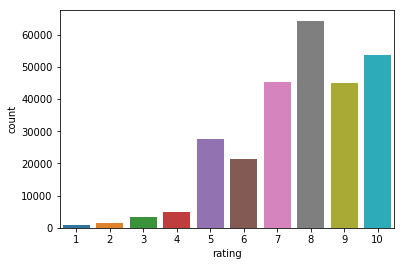

In [31]:
sb.countplot(x=ratings_explicit["rating"])
plt.show()

### Recommedation System

### Simple Popularity based Recommendation System

In [32]:
ratings_count = pd.DataFrame(ratings_explicit.groupby(['ISBN'])['rating'].sum())
top_10 = ratings_count.sort_values('rating', ascending=False).head(10)
print("Top 10 recommended books based on Popularity are - \n\n")
top_10.merge(books, left_index= True, right_on="ISBN")

Top 10 recommended books based on Popularity are - 




,rating,ISBN,book_title,book_author,year_of_publication,publisher
408,3862,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
748,3127,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
26,2108,0971880107,Wild Animus,Rich Shapero,2004,Too Far
2143,1974,059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,1999,Arthur A. Levine Books
522,1869,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
356,1838,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
118,1781,0671027360,"Angels &amp, Demons",Dan Brown,2001,Pocket Star
107,1631,0786868716,The Five People You Meet in Heaven,Mitch Albom,2003,Hyperion
5506,1612,043935806X,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,2003,Scholastic
1105,1603,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial


In [33]:
# reducing the dataset to users who have rated 100 books and to books which are rated by 100 users

counts1 = ratings_explicit['user_id'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['user_id'].isin(counts1[counts1 >= 100].index)]

counts2 = ratings_explicit['rating'].value_counts()
ratings_explicit = ratings_explicit[ratings_explicit['rating'].isin(counts2[counts2 >= 100].index)]

print(ratings_explicit)

         user_id        ISBN  rating
1456     277427   002542730X  10    
1458     277427   003008685X  8     
1461     277427   0060006641  10    
1465     277427   0060542128  7     
1474     277427   0061009059  9     
1477     277427   0062507109  8     
1483     277427   0132220598  8     
1488     277427   0140283374  6     
1490     277427   014039026X  8     
1491     277427   0140390715  7     
1494     277427   0141439742  8     
1497     277427   0152050167  10    
1501     277427   0201000822  10    
1506     277427   0310435706  10    
1509     277427   0312944691  8     
1522     277427   0316776963  8     
1543     277427   0345413903  10    
1554     277427   0375408886  9     
1560     277427   0375751513  9     
1564     277427   0380702843  8     
1570     277427   0380791978  9     
1571     277427   038081904X  9     
1578     277427   0385424736  9     
1581     277427   0385486804  9     
1583     277427   0385503857  9     
1584     277427   0385504209  8     
1

### Generating User-Item Rating Matrix

In [34]:
ratings_matrix = ratings_explicit.pivot(index='user_id', columns='ISBN', values='rating')
user_id = ratings_matrix.index

ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head(10)

(353, 50667)


ISBN,0000913154,000104799X,0001048082,0001055607,0001056107,0001845039,0001935968,0001952803,0001953877,0002000547,...,B00007FYKW,B00008RWPV,B000092Q0A,B00009EF82,B00009NDAN,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B000234N3A
user_id,,,,,,,,,,,,,,,,,,,,,
2033,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4385,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6251,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6543,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7286,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# since nan cannot be handled by training algorithms, replacing these by 0, which indicates absence of ratings

ratings_matrix.fillna(0, inplace = True)
ratings_matrix = ratings_matrix.astype(np.int32)

ratings_matrix.tail(10)

ISBN,0000913154,000104799X,0001048082,0001055607,0001056107,0001845039,0001935968,0001952803,0001953877,0002000547,...,B00007FYKW,B00008RWPV,B000092Q0A,B00009EF82,B00009NDAN,B0000T6KHI,B0000VZEJQ,B0000X8HIE,B00013AX9E,B000234N3A
user_id,,,,,,,,,,,,,,,,,,,,,
268932,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
269566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
270713,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271705,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
273113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,10,0,0,0,0,0
275970,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout

In [37]:
# setting global variables

global metric,k

k=10 # number of similar item
metric='cosine' # similarity metric

### User - based Recommendation System

In [38]:
#This function finds k similar users given the user_id and ratings matrix 

def findksimilarusers(user_id, ratings, metric = metric, k=k):
    similarities=[]
    indices=[]
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    model_knn.fit(ratings)
    loc = ratings.index.get_loc(user_id)
    
    # `loc` position user, checking top 10 rating among all the books
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k)
    
    similarities = 1-distances.flatten()
    return similarities,indices

In [39]:
# compute the actual mean 

def find_actual_mean(series) :
    
    n = 0
    sum = 0
    
    for i in series:
        if (i != 0):
            sum = sum + i
            n=n+1
            
    return sum/n

In [40]:
import random

#This function predicts rating for specified user-item combination based on user-based approach

def predict_userbased(user_id, item_id, ratings, metric = metric, k=k):
    prediction=0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilarusers(user_id, ratings,metric, k) #similar users based on cosine similarity
    
    #mean_rating = ratings.iloc[user_loc,:].mean() #to adjust for zero based indexing
    mean_rating = find_actual_mean(ratings.iloc[user_loc,:])
    #print(mean_rating)
    sum_wt = np.sum(similarities)-1
    product=1
    wtd_sum = 0 
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
            continue;
        else: 
            #print(ratings.iloc[indices.flatten()[i],:])
            #print(find_actual_mean(ratings.iloc[indices.flatten()[i],:]))
            if (ratings.iloc[indices.flatten()[i],item_loc] == 0):
                ratings_diff = random.randint(1,10)-find_actual_mean(ratings.iloc[indices.flatten()[i],:])
            else :
                ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]-find_actual_mean(ratings.iloc[indices.flatten()[i],:])
            
            #print(ratings_diff)
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
    
    prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    
    if prediction <= 0:
        prediction = 1   
    elif prediction > 10:
        prediction = 10
    
    print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))

    return prediction

In [41]:
predict_userbased(277427,'0002000547',ratings_matrix)


Predicted rating for user 277427 -> item 0002000547: 4


4

### Item - based Recommendation System

In [42]:
# This function finds k similar items given the item_id and ratings matrix

def findksimilaritems(item_id, ratings, metric=metric, k=k):
    similarities=[]
    indices=[]
    ratings=ratings.T
    loc = ratings.index.get_loc(item_id)
    # print(loc)
    # print(item_id)
    
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    
    # `loc` position item
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k)
    similarities = 1-distances.flatten()

    return similarities,indices

In [43]:
similarities,indices=findksimilaritems('0001056107',ratings_matrix)
print(similarities)
print(indices)

[1.         0.99227788 0.87811408 0.73582366 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678]
[[    4 47254 36887  1606 24239 39197 27004 24238 24254 30911]]


In [44]:
#This function predicts the rating for specified user-item combination based on item-based approach

def predict_itembased(user_id, item_id, ratings, metric = metric, k=k):
    prediction= wtd_sum =0
    
    user_loc = ratings.index.get_loc(user_id)
    print(user_loc)
    item_loc = ratings.columns.get_loc(item_id)
    print(item_loc)
    similarities, indices=findksimilaritems(item_id, ratings) #similar users based on correlation coefficients
    print(similarities)
    print(indices)
    
    sum_wt = np.sum(similarities)-1
    product=1
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == item_loc:
            continue;
        else:
            if (ratings.iloc[user_loc,indices.flatten()[i]] == 0):
                product = random.randint(1,10) * similarities[i]
            else :
                product = ratings.iloc[user_loc,indices.flatten()[i]] * similarities[i]
            
            wtd_sum = wtd_sum + product                                    
    
    #print((ratings.iloc[user_loc,indices.flatten()]))
    #print(wtd_sum)
    #print(sum_wt)
    #print(similarities)
    prediction = int(round(wtd_sum/sum_wt))
    
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10

    print('\nPredicted rating for user {0} -> item {1}: {2}'.format(user_id,item_id,prediction))      
    
    return prediction

In [45]:
prediction = predict_itembased(277427,'0001056107',ratings_matrix)

352
4
[1.         0.99227788 0.87811408 0.73582366 0.70710678 0.70710678
 0.70710678 0.70710678 0.70710678 0.70710678]
[[    4 47254 36887  1606 24239 39197 27004 24238 24254 30911]]

Predicted rating for user 277427 -> item 0001056107: 6


In [46]:
#This function utilizes above functions to recommend items for item/user based approach and cosine/correlation. 
#Recommendations are made if the predicted rating for an item is >= to 6,and the items have not been rated already

def recommendItem(user_id, ratings, metric=metric):    
    if (user_id not in ratings.index.values) or type(user_id) is not int:
        
        print("User id should be a valid integer from this list :\n\n {} "
              .format(re.sub('[\[\]]', '', np.array_str(ratings_matrix.index.values))))
    
    else:    
        ids = ['None',
               'Item-based (correlation)', 
               'Item-based (cosine)',
               'User-based (correlation)',
               'User-based (cosine)']
        
        select = widgets.Dropdown(options=ids, value=ids[0],description='Approach ', width='500px')
        
        def on_change(change):
            
            #clear_output(wait=True)
            prediction = []            
            
            if change['type'] == 'change' and change['name'] == 'value':            
                if (select.value == 'Item-based (correlation)') | (select.value == 'User-based (correlation)') :
                    metric = 'correlation'
                else:                       
                    metric = 'cosine'   
                
                with suppress_stdout():
                    if (select.value == 'Item-based (correlation)') | (select.value == 'Item-based (cosine)'):
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): # rated already
                                print(ratings.columns[i])
                                prediction.append(predict_itembased(user_id, str(ratings.columns[i]) ,ratings, metric))
                    else:
                        for i in range(ratings.shape[1]):
                            if (ratings[str(ratings.columns[i])][user_id] !=0): # rated already
                                prediction.append(predict_userbased(user_id, str(ratings.columns[i]) ,ratings, metric))
                                
                prediction = pd.Series(prediction)
                prediction = prediction.sort_values(ascending=False)
                
                recommended = prediction[:10]
                
                print("As per {0} approach, Following books are recommended, ".format(select.value))
                
                for i in range(len(recommended)):
                     print("{0}. {1}".format(i+1,books.book_title[recommended.index[i]].encode('utf-8')))                        
        
        select.observe(on_change)
        display(select)

In [47]:
# checking for incorrect entries

print(recommendItem(999999,ratings_matrix))

User id should be a valid integer from this list :

   2033   2276   4017   4385   5582   6251   6543   7286   7346   8067
   8245   8681   8890  10560  11993  12538  12824  12982  13552  13850
  15408  15418  16634  16795  16966  17950  19085  23768  23872  25409
  25601  26535  26544  28591  28634  29259  30276  30711  31315  31556
  31826  32773  33145  35433  35836  35857  36299  36554  36606  36609
  36836  36907  37644  37712  38023  38281  39281  39467  40889  40943
  43246  43910  46398  48025  48494  49144  51883  52199  52350  52584
  52614  52917  53220  55187  55490  55492  56271  56399  56447  56554
  56959  59172  60244  60337  60707  63714  63956  65258  66942  67840
  69078  69389  69697  70415  70594  70666  72352  73681  75591  76151
  76223  76626  78553  78783  78834  78973  79441  81492  83287  83637
  83671  85526  85656  86947  87555  88283  88677  88693  91113  92652
  92810  93047  93363  93629  94242  94347  94853  94951  95359  95902
  95932  97754  98391  98

In [52]:
recommendItem(274061, ratings_matrix)

Dropdown(description='Approach ', options=('None', 'Item-based (correlation)', 'Item-based (cosine)', 'User-ba…

As per Item-based (correlation) approach, Following books are recommended, 
1. b'Memoirs of a Geisha'
2. b'The Dragons of Eden: Speculations on the Evolution of Human Intelligence'
3. b'My First Cousin Once Removed: Money, Madness, and the Family of Robert Lowell'
4. b'Modern Manners: An Etiquette Book for Rude People'
5. b'Prescription for Terror'
6. b"Anil's Ghost"
7. b'The Ruby in the Smoke (Sally Lockhart Trilogy, Book 1)'
8. b'Starship Troopers'
9. b"Life's Little Instruction Book (Life's Little Instruction Books (Paperback))"
10. b'The Prince'


In [53]:
recommendItem(274061, ratings_matrix)

Dropdown(description='Approach ', options=('None', 'Item-based (correlation)', 'Item-based (cosine)', 'User-ba…

As per Item-based (cosine) approach, Following books are recommended, 
1. b'Memoirs of a Geisha'
2. b'Slow Waltz in Cedar Bend'
3. b'El Senor De Los Anillos: LA Comunidad Del Anillo (Lord of the Rings (Spanish))'
4. b'The Catcher in the Rye'
5. b'My First Cousin Once Removed: Money, Madness, and the Family of Robert Lowell'
6. b'Modern Manners: An Etiquette Book for Rude People'
7. b'Prescription for Terror'
8. b"Anil's Ghost"
9. b'The Ruby in the Smoke (Sally Lockhart Trilogy, Book 1)'
10. b'Starship Troopers'


In [54]:
recommendItem(274061, ratings_matrix)

Dropdown(description='Approach ', options=('None', 'Item-based (correlation)', 'Item-based (cosine)', 'User-ba…

As per User-based (correlation) approach, Following books are recommended, 
1. b'Rich Dad, Poor Dad: What the Rich Teach Their Kids About Money--That the Poor and Middle Class Do Not!'
2. b'This Year It Will Be Different: And Other Stories'
3. b'Prague : A Novel'
4. b'Relics (Star Trek: The Next Generation)'
5. b'The Catswold Portal'
6. b'Das B\xc3\x83?\xc3\x82\xc2\xb6se kommt auf leisen Sohlen.'
7. b'Female Intelligence'
8. b"Pasquale's Nose: Idle Days in an Italian Town"
9. b"Corelli's Mandolin : A Novel"
10. b'Black Beauty (Illustrated Classics)'


In [55]:
recommendItem(274061, ratings_matrix)

Dropdown(description='Approach ', options=('None', 'Item-based (correlation)', 'Item-based (cosine)', 'User-ba…

As per User-based (cosine) approach, Following books are recommended, 
1. b'The Soulbane Stratagem'
2. b'Private Screening'
3. b'Seabiscuit'
4. b"Prize Stories, 1987: The O'Henry Awards"
5. b'The Catswold Portal'
6. b'Cybill Disobedience: How I Survived Beauty Pageants, Elvis, Sex, Bruce Willis, Lies, Marriage, Motherhood, Hollywood, and the Irrepressible Urge to Say What I Think'
7. b'Lying Awake'
8. b"Through Wolf's Eyes (Wolf)"
9. b'Sturmzeit. Roman.'
10. b'Every Breath You Take : A True Story of Obsession, Revenge, and Murder'
